In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from astropy.table import Table
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib

import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import galpy
from galpy.orbit import Orbit
import math

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

In [2]:
data = Table.read('/Users/ioanaciuca/Desktop/BINGO_P3/data/SD_pred_highquality.fits')

In [3]:
mask = ((data['M_H_1'] > -1.0) & (data['R_2'] >=7.0) & (data['R_2'] <= 9.0) & (data['z_2c'] <= 2.0))
data_cut = data[mask]

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)



# Picking the triangle

In [4]:
mh = data_cut['M_H_1']
alpha = data_cut['ALPHA_M_1']
logAge = data_cut['pred_logAge']
vz = data_cut['vz_2']
vphi = data_cut['vphi_2']
Jz = data_cut['Jz_2']
Rc = data_cut['Rc_2']
JR = data_cut['JR_2']
R = data_cut['R_2']

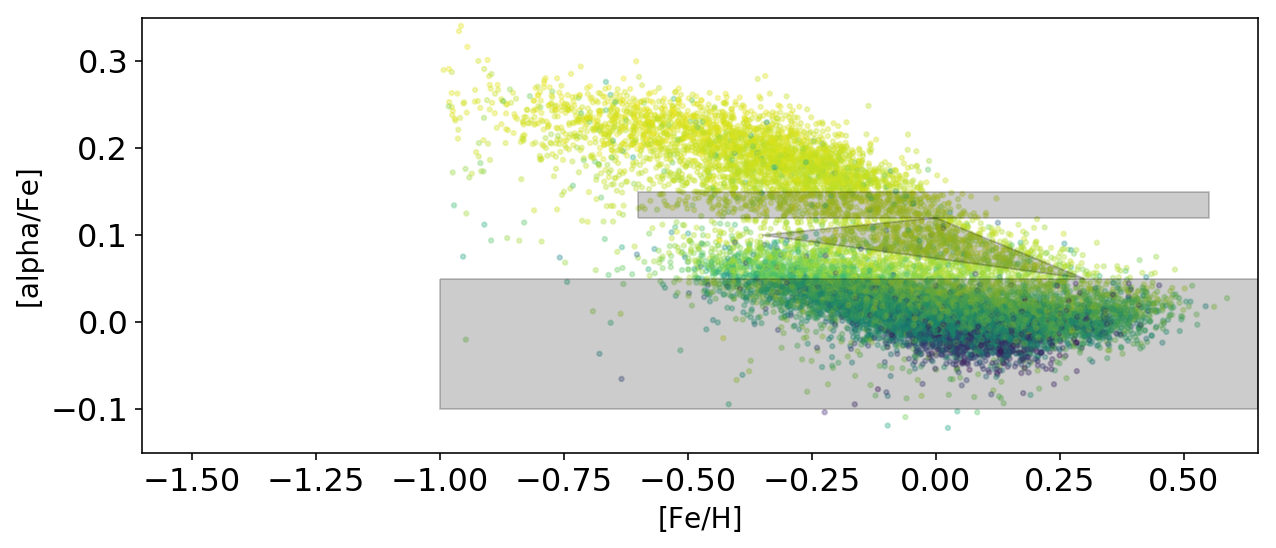

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

im = ax.scatter(mh, alpha, s=5, alpha=0.3, c=logAge)

ax.set_xlabel('[Fe/H]', fontsize=14)
ax.set_ylabel('[alpha/Fe]', fontsize=14)

# hal hfe selection
polygon = Polygon([(-0.35, 0.1), (0.3, 0.05), (0.0, 0.12)])
patch = PolygonPatch(polygon, facecolor=[0,0,0.5], color='k', edgecolor=[1,1,1], alpha=0.2) 

# low alpha selection
polygon_lowal = Polygon([(-1.0, 0.05), (-1.0, -0.1), (0.65, -0.1), (0.65, 0.05)])
patch_lowal= PolygonPatch(polygon_lowal, facecolor=[0.0,0.0,0.0], color='k', edgecolor=[1,1,1], alpha=0.2) 

polygon_highal = Polygon([(-0.6, 0.12), (-0.6, 0.15), (0.55, 0.15), (0.55, 0.12)])
patch_highal = PolygonPatch(polygon_highal, facecolor=[0.0,0.0,0.0], color='k', edgecolor=[1,1,1], alpha=0.2) 

ax.set_ylim(-0.15, 0.35)
ax.set_xlim(-1.6, 0.65)

ax.add_patch(patch)
ax.add_patch(patch_lowal)
ax.add_patch(patch_highal)

#plt.savefig('./regions.png')

In [16]:
mask_halhfe = []
mask_lowalpha = []
mask_highalpha = []
for i in range(len(mh)):
    p1 = Point(mh[i], alpha[i])
    
    mask_halhfe.append(polygon.contains(p1))
    mask_lowalpha.append(polygon_lowal.contains(p1))
    mask_highalpha.append(polygon_highal.contains(p1))


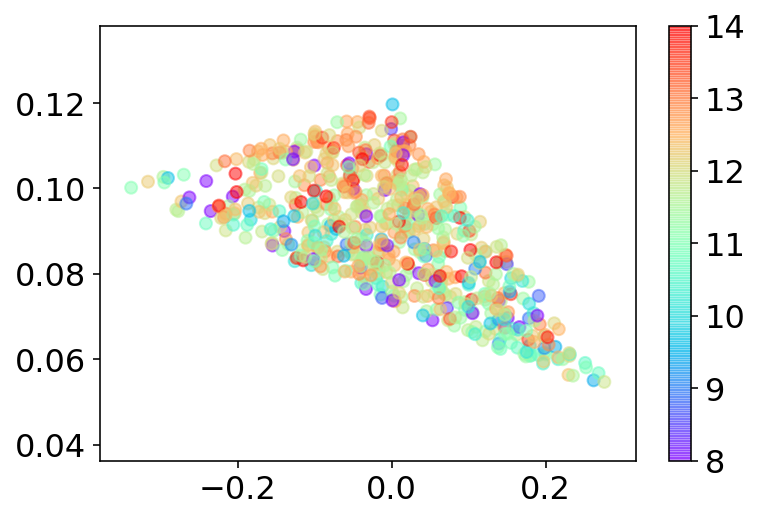

In [18]:
hal_hfe = data_cut[mask_halhfe]
norm_age = mpl.colors.Normalize(vmin=8.0, vmax=14)

plt.scatter(hal_hfe['M_H_1'],hal_hfe['ALPHA_M_1'], alpha=0.5, c=10**hal_hfe['pred_logAge'], norm=norm_age, cmap='rainbow')
plt.colorbar()

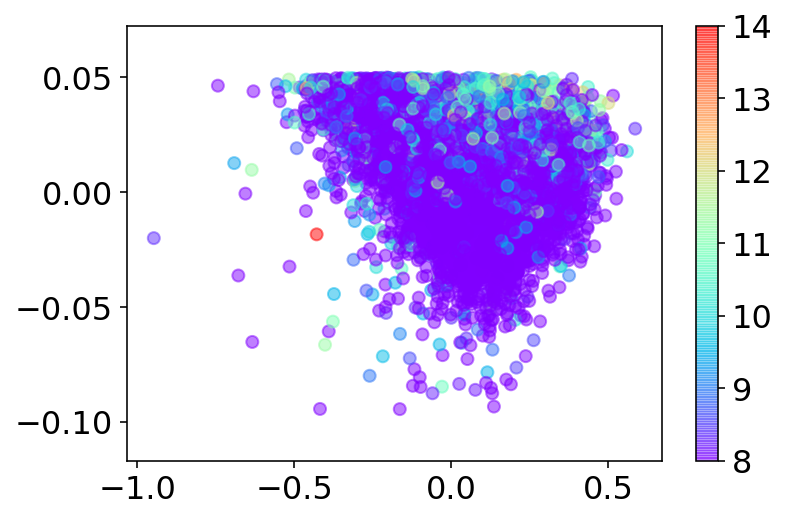

In [19]:
lowal = data_cut[mask_lowalpha]

norm_age = mpl.colors.Normalize(vmin=8.0, vmax=14)

plt.scatter(lowal['M_H_1'], lowal['ALPHA_M_1'], alpha=0.5, c=10**lowal['pred_logAge'], norm=norm_age, cmap='rainbow')
plt.colorbar()

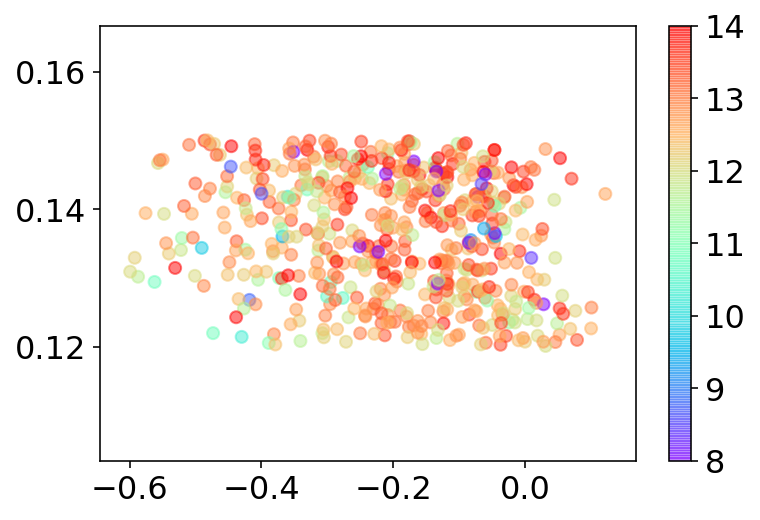

In [20]:
highal = data_cut[mask_highalpha]

norm_age = mpl.colors.Normalize(vmin=8.0, vmax=14)

plt.scatter(highal['M_H_1'], highal['ALPHA_M_1'], alpha=0.5, c=10**highal['pred_logAge'], norm=norm_age, cmap='rainbow')
plt.colorbar()

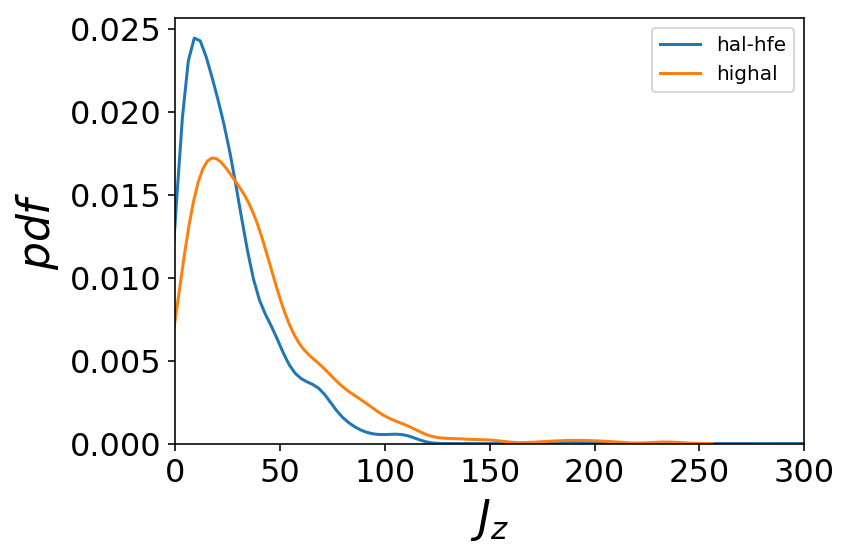

In [22]:
fig, ax = plt.subplots()
import seaborn as sns

ax = sns.kdeplot(hal_hfe['Jz_2'], label='hal-hfe')
ax = sns.kdeplot(highal['Jz_2'], label='highal')
#ax = sns.kdeplot(lowal['Jz_2'], label='lowal')

ax.set_ylabel(r'$pdf$', fontsize=22)
ax.set_xlabel(r'$J_z$', fontsize=22)

ax.set_xlim(0, 300)

fig.tight_layout()

plt.savefig('./jz_halhfe_highal_lowal.png')

#plt.savefig('./afe_feh_general.png', format='png', dpi=200)

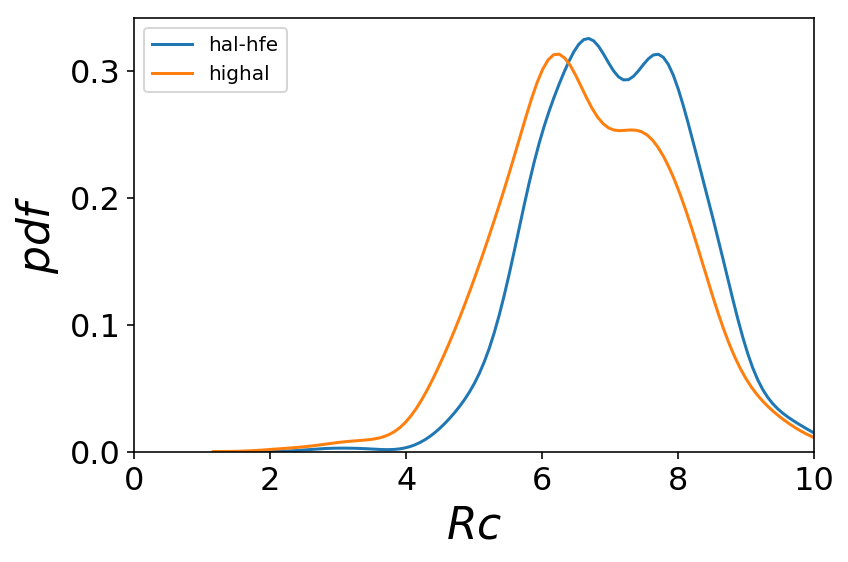

In [23]:
fig, ax = plt.subplots()
import seaborn as sns

ax = sns.kdeplot(hal_hfe['Rc_2'], label='hal-hfe')
ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax.set_ylabel(r'$pdf$', fontsize=22)
ax.set_xlabel(r'$Rc$', fontsize=22)

ax.set_xlim(0, 10)

fig.tight_layout()

#plt.savefig('./rc_halhfe_highal_lowal.png')

In [24]:
mask1 = (10**hal_hfe['pred_logAge'] >= 13)
halhfe_13 = hal_hfe[mask1]
len(halhfe_13)

64

In [25]:
mask2 = ((10**hal_hfe['pred_logAge'] >= 12) & (10**hal_hfe['pred_logAge'] < 13))
halhfe_12_13 = hal_hfe[mask2]
len(halhfe_12_13)

221

In [26]:
mask3 = ((10**hal_hfe['pred_logAge'] >= 11) & (10**hal_hfe['pred_logAge'] < 12))
halhfe_11_12 = hal_hfe[mask3]
len(halhfe_11_12)

219

In [27]:
mask4 = ((10**hal_hfe['pred_logAge'] >= 10) & (10**hal_hfe['pred_logAge'] < 11))
halhfe_10_11 = hal_hfe[mask4]
len(halhfe_10_11)

68

(array([17., 13.,  9.,  8., 11.,  0.,  2.,  3.,  0.,  1.]),
 array([13.00618464, 13.23795302, 13.4697214 , 13.70148978, 13.93325816,
        14.16502654, 14.39679492, 14.62856329, 14.86033167, 15.09210005,
        15.32386843]),
 <a list of 10 Patch objects>)

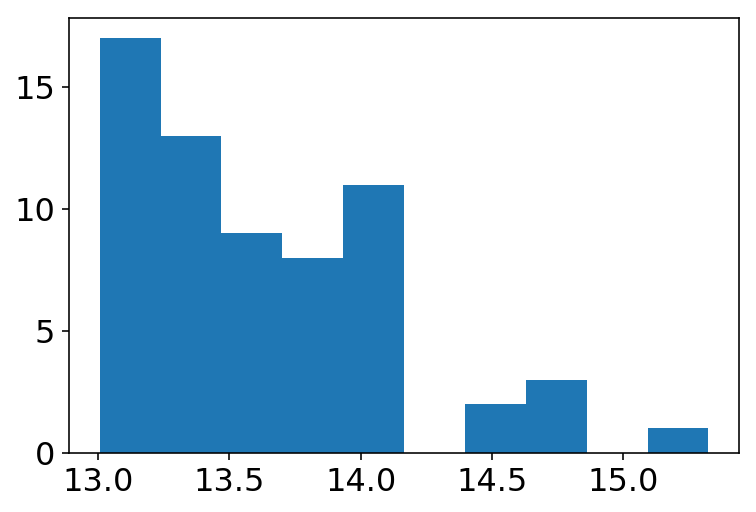

In [28]:
plt.hist(10**halhfe_13['pred_logAge'])

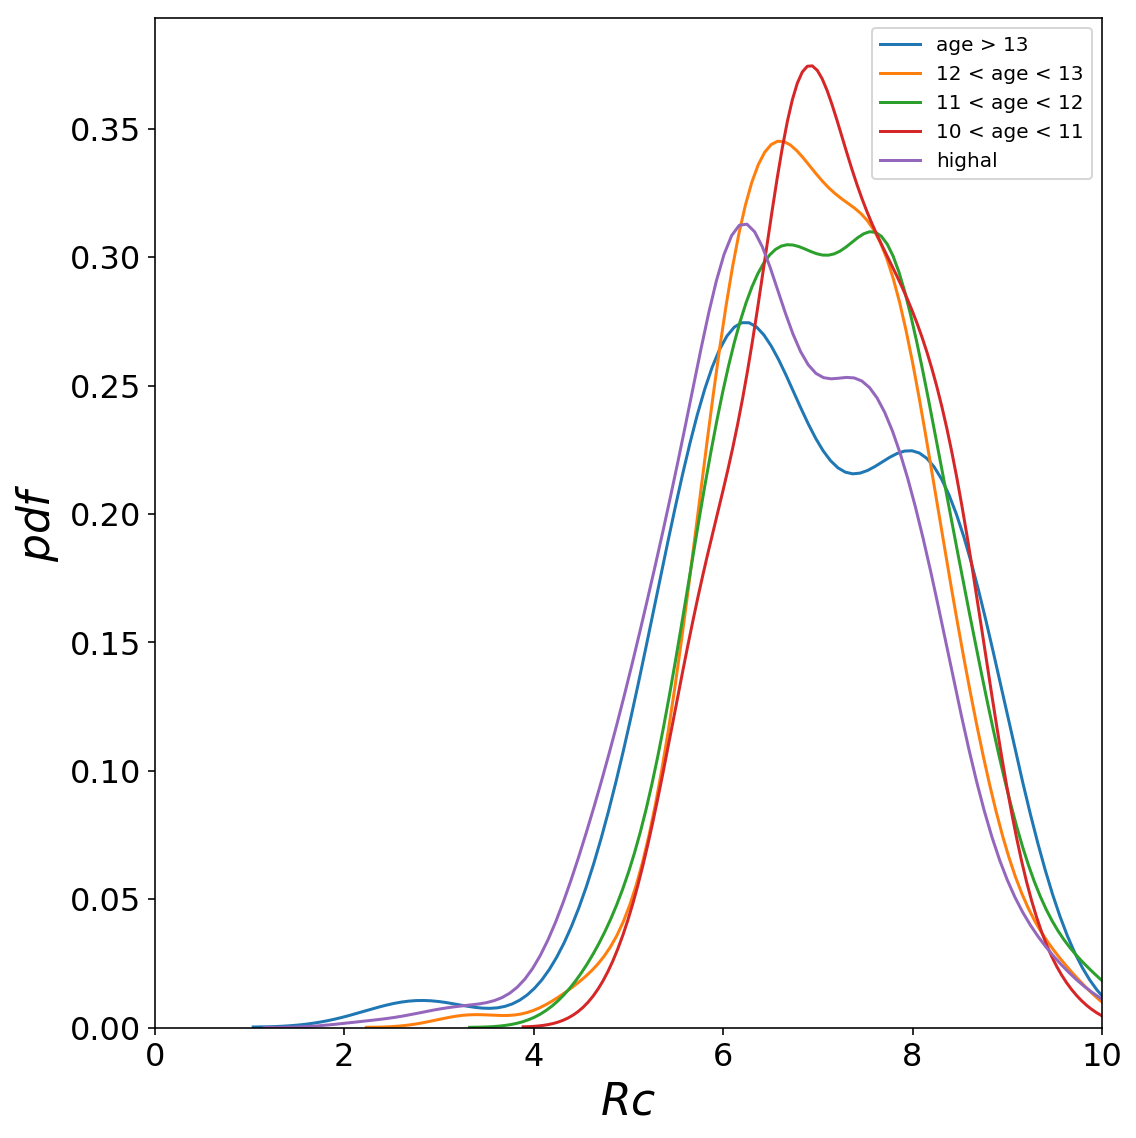

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
import seaborn as sns

ax = sns.kdeplot(halhfe_13['Rc_2'], label='age > 13')
ax = sns.kdeplot(halhfe_12_13['Rc_2'], label='12 < age < 13')
ax = sns.kdeplot(halhfe_11_12['Rc_2'], label='11 < age < 12')
ax = sns.kdeplot(halhfe_10_11['Rc_2'], label='10 < age < 11')

ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax.set_ylabel(r'$pdf$', fontsize=22)
ax.set_xlabel(r'$Rc$', fontsize=22)

ax.set_xlim(0, 10)

fig.tight_layout()

#fig.savefig('./rc_dist.png')

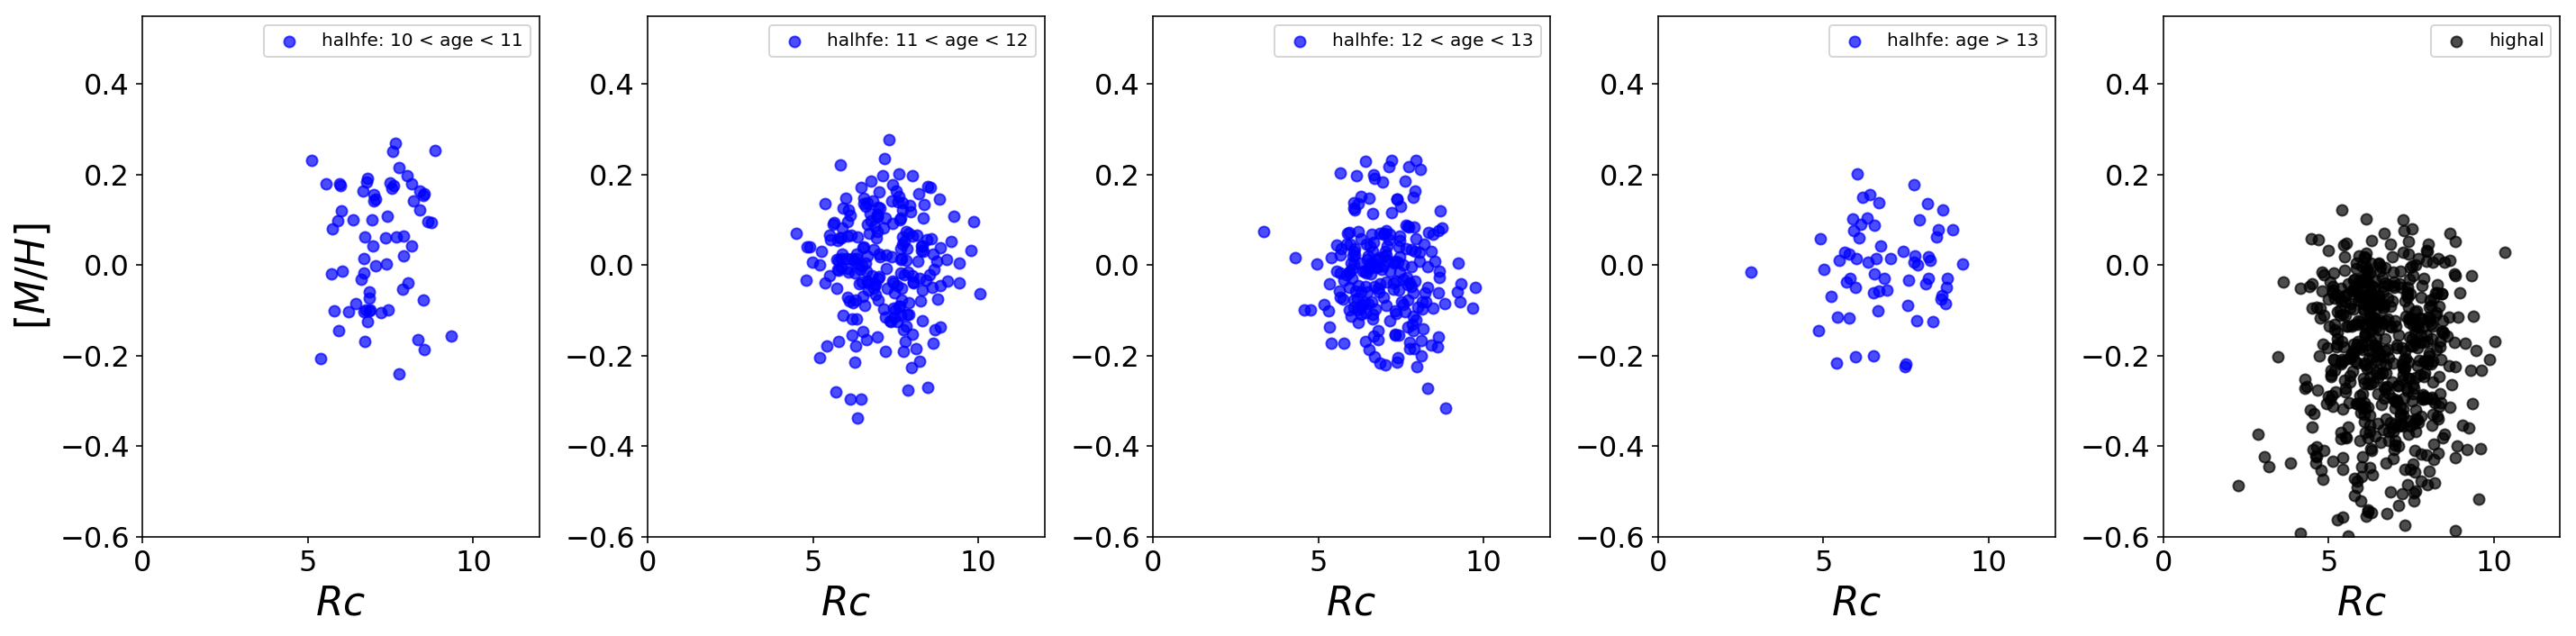

In [32]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
import seaborn as sns

ax4.scatter(halhfe_13['Rc_2'], halhfe_13['M_H_1'], color='b', alpha=0.7, label='halhfe: age > 13')
ax3.scatter(halhfe_12_13['Rc_2'], halhfe_12_13['M_H_1'], color='b', alpha=0.7, label='halhfe: 12 < age < 13')
ax2.scatter(halhfe_11_12['Rc_2'], halhfe_11_12['M_H_1'], color='b', alpha=0.7, label='halhfe: 11 < age < 12')
ax1.scatter(halhfe_10_11['Rc_2'], halhfe_10_11['M_H_1'], color='b', alpha=0.7, label='halhfe: 10 < age < 11')
ax5.scatter(highal['Rc_2'],highal['M_H_1'], color='k', alpha=0.7, label='highal')
#ax = sns.kdeplot(highal['Rc_2'], label='highal')
#ax = sns.kdeplot(lowal['Rc_2'], label='lowal')

ax1.set_ylabel(r'$[M/H]$', fontsize=22)
ax1.set_xlabel(r'$Rc$', fontsize=22)
ax2.set_xlabel(r'$Rc$', fontsize=22)
ax3.set_xlabel(r'$Rc$', fontsize=22)
ax4.set_xlabel(r'$Rc$', fontsize=22)
ax5.set_xlabel(r'$Rc$', fontsize=22)

ax1.set_xlim(0, 12)
ax2.set_xlim(0, 12)
ax3.set_xlim(0, 12)
ax4.set_xlim(0, 12)
ax5.set_xlim(0, 12)

ax1.set_ylim(-0.6, 0.55)
ax2.set_ylim(-0.6, 0.55)
ax3.set_ylim(-0.6, 0.55)
ax4.set_ylim(-0.6, 0.55)
ax5.set_ylim(-0.6, 0.55)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

fig.tight_layout()

#fig.savefig('./rc_mh_halhfe_highal.png')

# Ridge analysis

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/matplotlib/patches.py:75: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties.
  warnings.warn("Setting the 'color' property will override"

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/matplotlib/patches.py:75: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties.
  warnings.warn("Setting the 'color' property will override"



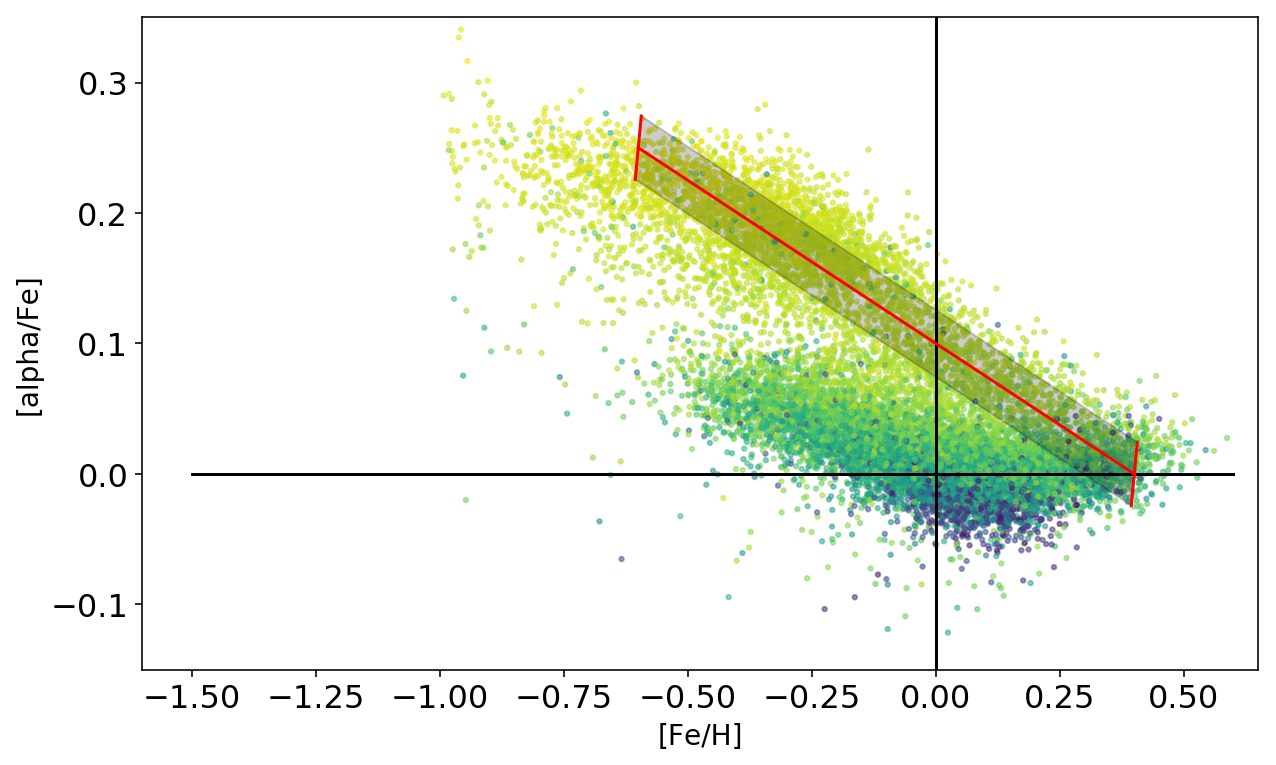

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

im = ax.scatter(mh, alpha, s=5, alpha=0.5, c=logAge)

ax.set_xlabel('[Fe/H]', fontsize=14)
ax.set_ylabel('[alpha/Fe]', fontsize=14)

# low alpha selection
polygon_lowal = Polygon([(-1.0, 0.05), (-1.0, -0.1), (0.65, -0.1), (0.65, 0.0)])
patch_lowal= PolygonPatch(polygon_lowal, facecolor=[0.0,0.0,0.0], color='k', edgecolor=[1,1,1], alpha=0.2) 

x1 = 0.0
y1 = -0.15

x2 = 0.0
y2 = 0.35


x3 = -1.5
y3 = 0.0

x4 = 0.6
y4 = 0.0

x5 = -0.6
y5 = 0.25

x6 = 0.4
y6 = 0.0

delta_x = math.sin(14*np.pi/180) * 0.025
delta_y = math.cos(14*np.pi/180) * 0.025
x7 = x5 - delta_x
y7 = y5 - delta_y

x8 = x5 + delta_x
y8 = y5 + delta_y

x9 = x6 - delta_x
y9 = y6 - delta_y

x10 = x6 + delta_x
y10 = y6 + delta_y

ax.plot([x1,x2],[y1,y2], color='k')
ax.plot([x3,x4],[y3,y4], color='k')
ax.plot([x5,x6],[y5,y6], color='r')
ax.plot([x7,x8],[y7,y8], color='r')
ax.plot([x9,x10],[y9,y10], color='r')


ax.set_ylim(-0.15, 0.35)
ax.set_xlim(-1.6, 0.65)


#ax.add_patch(patch_lowal)

new_polygon = Polygon([(x7, y7),(x8,y8), (x10, y10),(x9, y9), ])
new_patch = PolygonPatch(new_polygon, facecolor=[0,0,0.5], color='k', edgecolor=[1,1,1], alpha=0.2) 

ax.add_patch(new_patch)
#ax.set_aspect('equal')

In [34]:
mask_ridge = []

for i in range(len(mh)):
    p1 = Point(mh[i], alpha[i])
    
    mask_ridge.append(new_polygon.contains(p1))

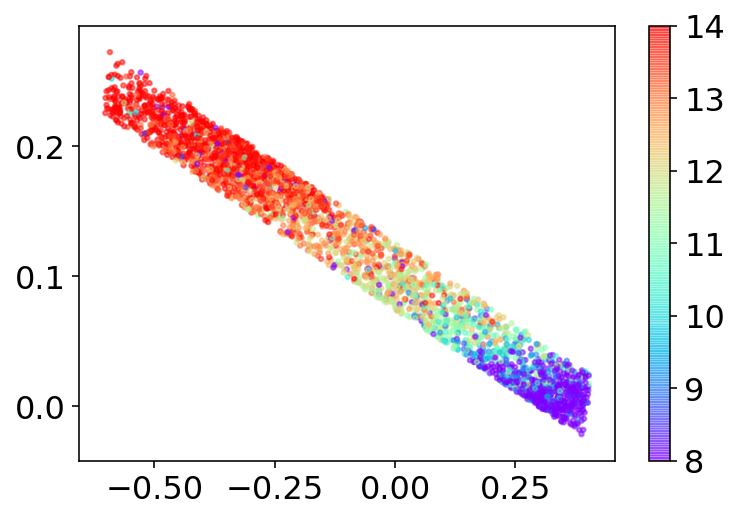

In [35]:
ridge = data_cut[mask_ridge]

norm_age = mpl.colors.Normalize(vmin=8.0, vmax=14)

plt.scatter(ridge['M_H_1'], ridge['ALPHA_M_1'], s=5,alpha=0.5, c=10**ridge['pred_logAge'], norm=norm_age, cmap='rainbow')
plt.colorbar()

In [65]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = px-ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = py-oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [66]:
new_ridge_mh = []
new_ridge_alpha = []
new_ridge_age = []
orig_ridge_mh = []
orig_ridge_alpha = []
origin = (x5, y5)
angle_rad = 14 * np.pi/180

for i in range(len(ridge['M_H_1'])):
    
        qx, qy = rotate(origin, (ridge['M_H_1'][i], ridge['ALPHA_M_1'][i]), angle_rad)
        new_ridge_mh.append(qx) 
        new_ridge_alpha.append(qy)
        new_ridge_age.append(ridge['pred_logAge'][i])
        orig_ridge_mh.append(ridge['M_H_1'][i])
        orig_ridge_alpha.append(ridge['ALPHA_M_1'][i])

Text(0.5, 0, '[alpha/Fe]')

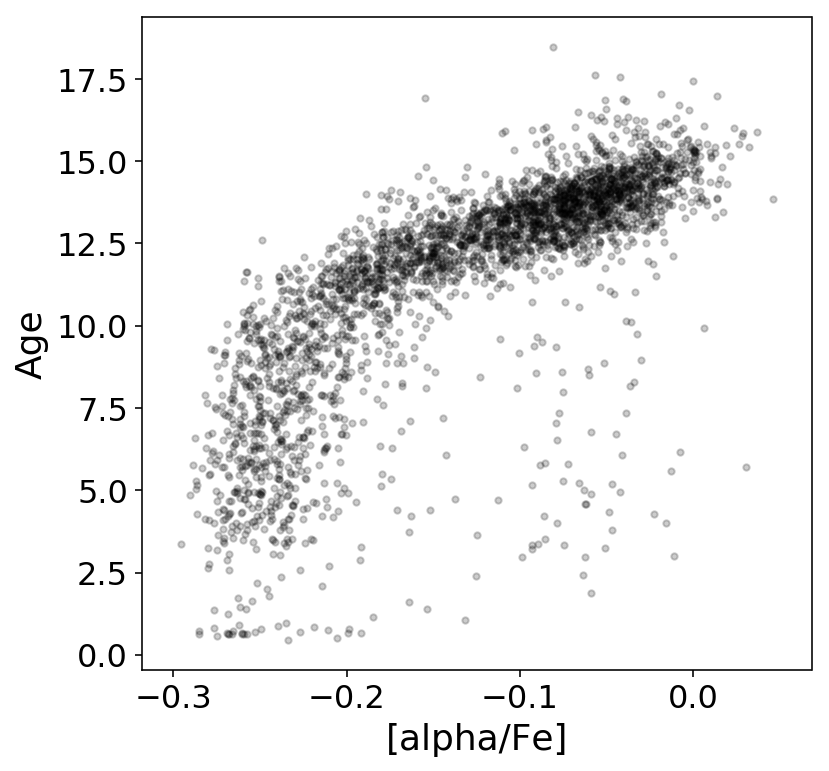

In [67]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(np.array(new_ridge_alpha), 10**ridge['pred_logAge'],  color='k', alpha=0.2, s = 10)
plt.ylabel('Age', fontsize=18)
plt.xlabel('[alpha/Fe]', fontsize=18)

(0, 300)

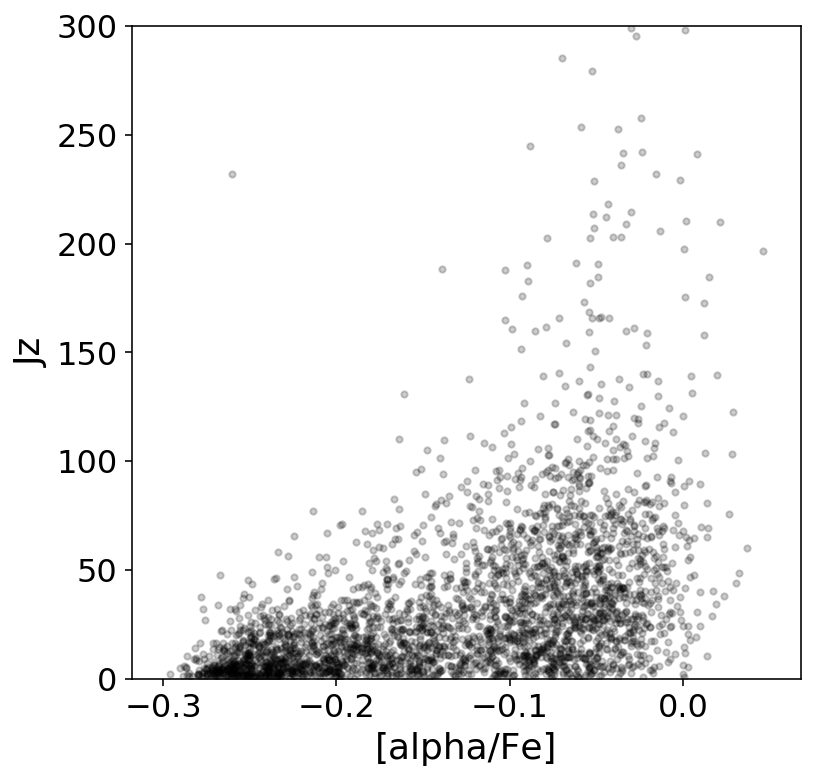

In [62]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(np.array(new_ridge_alpha), ridge['Jz_2'],  color='k', alpha=0.2, s = 10)
plt.ylabel('Jz', fontsize=18)
plt.xlabel('[alpha/Fe]', fontsize=18)

plt.ylim(0,300)